### Loading the Data

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F638842%2F1134513%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240814%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240814T114225Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D33db6d8ec5ac18da58ea1a098564dbb00a655c4c43ffc3d01a5cc30e77409d01b865d02f655a506c25c6491fdd1328c90c6e3234a2d0d8a88c97cd0569bd07ad68d15ed3a5b74d7fa9e152526793e2744c59620a40249d428bddd92e211a1b94d05a4753acef25e9a9b25e14b797055dd38d91b6fdebd6bd1e6b8809876a41d833318310fbe731cccd41cb5d240bbd954d0a721cedec391f0f45bb0c7eaac676eab3d248ba330d73b62bdc82f4dde4c11845b5a263a8f0d9310205c7e073aedb4e205d328f599212feb6be8a6fd2b41ba03e6ae28f7dff920ea94293c5b6c83f18f8a6da6e1913415166f8a8df6ed44025a17356dba9cde779042bd392a037d5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 103633768 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mitbih_train.csv
/kaggle/input/ptbdb_abnormal.csv
/kaggle/input/ptbdb_normal.csv
/kaggle/input/mitbih_test.csv


## Fetching the Saved Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Path to the model file on Google Drive
model_path = '/content/drive/My Drive/models/cnn.h5'

# Load the model
model = load_model(model_path)

In [ ]:
df_train = pd.read_csv('/kaggle/input/mitbih_train.csv')

In [ ]:
df_normal = pd.read_csv('/kaggle/input/ptbdb_normal.csv')

In [ ]:
df_abnormal = pd.read_csv('/kaggle/input/ptbdb_abnormal.csv')

In [ ]:
df_train_col = df_train.columns
df_normal_col = df_normal.columns
df_abnormal_col = df_abnormal.columns

In [ ]:
common = df_train_col.intersection(df_normal_col).intersection(df_abnormal_col)

In [ ]:
df_test = pd.read_csv('/kaggle/input/mitbih_test.csv')

In [ ]:
df_train = df_train[common]
df_test = df_test[common]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 67, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 67, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu (ELU)                            │ (None, 67, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 67, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 67, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_1 (ELU)                          │ (None, 67, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 33, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 33, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 33, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_2 (ELU)                          │ (None, 33, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 33, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 33, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_3 (ELU)                          │ (None, 33, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 16, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 16, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_4 (ELU)                          │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 16, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 128)             │             5

 Total params: 361,251 (1.38 MB)

 Trainable params: 359,841 (1.37 MB)

 Non-trainable params: 1,408 (5.50 KB)

 Optimizer params: 2 (12.00 B)

### Labelling Train and Test Data

In [ ]:
df_train.shape

(87553, 67)

In [ ]:
y = model.predict(df_train)

2737/2737 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step


In [ ]:
result = np.where(y > 0.5, 1, 0)

In [ ]:
df_train['label']=result

In [ ]:
df_train['label'].unique()

array([1, 0])

In [ ]:
y = model.predict(df_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


In [ ]:
result = np.where(y > 0.5, 1, 0)

In [ ]:
df_test['label']=result

In [ ]:
df_test['label'].unique()

array([1, 0])

In [ ]:
X = df_train.drop(columns=['label'])
y = df_train['label']

### Data Preprocessing of the Train Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_normalized = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
X_train = X_train.reshape((70042, 67, 1))
print(X_train.shape)

(70042, 67)
(70042, 67, 1)


### Creating new model with same architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, BatchNormalization, ELU, Dropout, Softmax

# Define the model
model1 = Sequential()

# L1: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=32, kernel_size=3, padding='same', input_shape=(67, 1)))
model1.add(BatchNormalization())
model1.add(ELU())

# L2: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=32, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(ELU())

# L3: MaxPooling1D
model1.add(MaxPooling1D(pool_size=2))

# L4: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(ELU())

# L5: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(ELU())

# L6: MaxPooling1D
model1.add(MaxPooling1D(pool_size=2))

# L7: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=128, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(ELU())

# L8: Conv1D + BatchNorm + ELU
model1.add(Conv1D(filters=128, kernel_size=3, padding='same'))
model1.add(BatchNormalization())
model1.add(ELU())

# L9: MaxPooling1D
model1.add(MaxPooling1D(pool_size=2))

# L10: Flatten + Dense
model1.add(Flatten())
model1.add(Dense(256, activation='elu'))
model1.add(Dropout(0.5))
model1.add(BatchNormalization())

# L11: Dense + Softmax for output
model1.add(Dense(1, activation='sigmoid'))  # Adjust based on the number of classes

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)                    │ (None, 67, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 67, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_6 (ELU)                          │ (None, 67, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 67, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 67, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_7 (ELU)                          │ (None, 67, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 33, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 33, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 33, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_8 (ELU)                          │ (None, 33, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 33, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 33, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_9 (ELU)                          │ (None, 33, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 16, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 16, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_10 (ELU)                         │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 16, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 16, 128)             │             5

 Total params: 361,249 (1.38 MB)

 Trainable params: 359,841 (1.37 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

### Training the Model

In [ ]:
history = model1.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.9427 - loss: 0.1499 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 2/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9986 - val_loss: 0.0076
Epoch 3/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.9988 - loss: 0.0037 - val_accuracy: 0.9987 - val_loss: 0.0049
Epoch 4/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9983 - val_loss: 0.0063
Epoch 5/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 75s 43ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9989 - val_loss: 0.0048
Epoch 6/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 7/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 8/100
1752/1752 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 

In [ ]:
X_test = X_test.reshape((17511, 67,1))
results = model1.predict(X_test)

548/548 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step


In [ ]:
results = np.where(results > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, results)
accuracy

0.9990862886185826

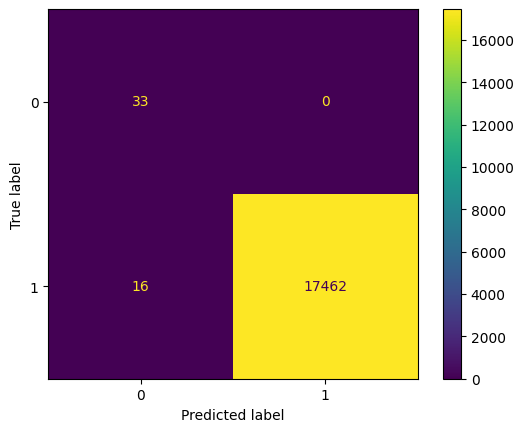

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, results)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.makedirs('/content/drive/My Drive/models', exist_ok=True)
model_save_path = '/content/drive/My Drive/models/cnn-final.h5'
model1.save(model_save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Conclusion
- The model is performing well because from the confusion matrix it can be seen that the False Negative is very low (i.e For very few cases the model saying that the person donot have Heart disease when the person is actually suffering from the disease)